CÂU 2: Việt Nam nằm trong top bao nhiêu, với mật độ ô nhiễm là bao nhiêu qua từng năm (2017 - 2021). Có sự thay đổi như nào ở Việt Nam trong giai đoạn này và sự thay đổi này là tốt hay xấu ? Thử giải thích. 

*Ý nghĩa của việc đặt ra câu hỏi này: Nhằm xác định mật độ ô nhiễm ở Việt Nam và thứ hạng của Việt Nam trên thế giới qua từng năm. Từ đó thấy được ô nhiễm ở Việt Nam đã thay đổi như thế nào, là tốt hay là xấu.*

In [2]:
# Gọi các thư viện cần thiết.  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Đầu tiên ta đọc file ./airdata6years.csv thành một dataframe và lưu vào df.

In [3]:
df = pd.read_csv('./airdata6years.csv', index_col = 'Unnamed: 0')
df.head()

,Rank,City,Country,Year_2021,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year_2020,Year_2019,Year_2018,Year_2017
0,1,Bhiwadi,India,106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,NaN
1,2,Ghaziabad,India,102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163.0,106.6,110.2,135.2,144.6
2,3,Hotan,China,101.5,NaN,NaN,158.0,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116.0,91.9
3,4,Delhi,India,96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,Jaunpur,India,95.3,182.2,143.5,91.0,70.0,51.1,40.7,33.5,34.2,36.8,75.7,196.0,195.7,NaN,NaN,NaN,NaN


*1.Việt Nam nằm ở top bao nhiêu trong giai đoạn 2017 - 2021*

Lấy dữ liệu mật độ ô nhiễm các quốc gia từ năm 2017 - 2021

In [26]:
#Do chỉ tính trong giai đoạn 2017 - 2021 nên sẽ xóa các cột không cần thiết 
df_Country = df.drop(['Rank', 'City','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], axis = 1)
df_Country

,Country,Year_2021,Year_2020,Year_2019,Year_2018,Year_2017
0,India,106.2,95.5,83.4,125.4,NaN
1,India,102.0,106.6,110.2,135.2,144.6
2,China,101.5,110.2,110.1,116.0,91.9
3,India,96.4,84.1,98.6,113.5,108.2
4,India,95.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
6470,Portugal,4.9,4.8,5.3,7.1,13.3
6471,Sweden,4.9,NaN,NaN,NaN,NaN
6472,United Kingdom,4.9,NaN,NaN,NaN,NaN
6473,United Kingdom,4.9,NaN,NaN,NaN,NaN


Dựa vào bảng dự liệu, ta thấy có nhiều ô dữ liệu có gía trị nan khá nhiều sẽ ảnh hưởng đến việc tính mật độ trung bình. Ta sẽ đổi sang giá trị median cho sai số không lớn.

In [27]:
#Những cột cần thay đổi giá trị 
year_cols = ['Year_2021', 'Year_2020', 'Year_2019', 'Year_2018', 'Year_2017']

#Thay đổi nan thành median 
for col in year_cols:
    med = df_Country[col].median()
    df_Country[col] = df_Country[col].fillna(med)

#Bảng sau khi đổi giá trị
df_Country

,Country,Year_2021,Year_2020,Year_2019,Year_2018,Year_2017
0,India,106.2,95.5,83.4,125.4,11.9
1,India,102.0,106.6,110.2,135.2,144.6
2,China,101.5,110.2,110.1,116.0,91.9
3,India,96.4,84.1,98.6,113.5,108.2
4,India,95.3,10.3,10.6,12.0,11.9
...,...,...,...,...,...,...
6470,Portugal,4.9,4.8,5.3,7.1,13.3
6471,Sweden,4.9,10.3,10.6,12.0,11.9
6472,United Kingdom,4.9,10.3,10.6,12.0,11.9
6473,United Kingdom,4.9,10.3,10.6,12.0,11.9


Tính mật độ trung bình của từng nước trong giai đoạn này

In [28]:
df_Country = df_Country.groupby('Country').mean()
df_Country

,Year_2021,Year_2020,Year_2019,Year_2018,Year_2017
Country,,,,,
Afghanistan,37.500000,46.500000,58.800000,61.800000,11.900000
Albania,12.500000,16.000000,10.600000,12.000000,11.900000
Algeria,20.000000,20.200000,21.200000,12.000000,11.900000
Andorra,7.300000,7.400000,10.600000,12.000000,11.900000
Angola,11.000000,13.000000,15.900000,12.000000,11.900000
...,...,...,...,...,...
United Arab Emirates,35.350000,28.250000,39.650000,52.050000,11.900000
United Kingdom,8.294194,8.476129,9.626452,11.354839,11.222581
Uruguay,14.200000,10.300000,10.600000,12.000000,11.900000


Việt Nam nằm trong top bao nhiêu qua từng năm (2017 - 2021).

In [29]:
#Hàm xử lý để tính thứ hạng
def get_rank(col):
    rank_year = df_Country.sort_values(by= col, ascending=False)
    i = 1
    while i <= 118:
       if rank_year.index[i] == 'Vietnam':
            break
       i += 1 
    return i

#Lập bảng thứ hạng của Việt Nam qua từng năm
index_info=["Vietnam"]
dict_info = {}
for i in df_Country.columns:
    dict_info[i] = get_rank(i)
top_Vietnam_df = pd.DataFrame(dict_info, index_info)
top_Vietnam_df = top_Vietnam_df[['Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021']]
top_Vietnam_df



,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021
Vietnam,20,28,35,34,30


Dựa vào bảng, ta thấy thứ hạng Việt Nam có sự thay đổi rõ rệt trong giai đoạn này. Ta sẽ lập biểu đồ để thấy rõ hơn sự thay đổi đó

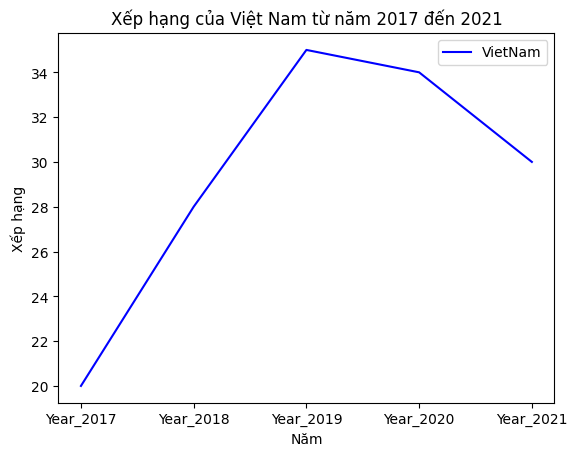

In [30]:
top_Vietnam = top_Vietnam_df.T.iloc[:, :5]
plt.plot(top_Vietnam, color = 'blue', linestyle = '-')
plt.title('Xếp hạng của Việt Nam từ năm 2017 đến 2021')
plt.xlabel('Năm')
plt.ylabel('Xếp hạng')
plt.legend(['VietNam'])

 NHẬN XÉT

_Ta thấy biểu đồ xếp hạng của Việt Nam đã tăng trong giai đoạn 2017 - 2019. Nhưng đây là biểu đồ xếp hạng, xếp hạng của Việt Nam càng tăng (về thứ hạng) thì mật độ ô nhiễm không khí càng giảm.

_Trong giai đoạn 2019 - 2021, xếp hạng Việt Nam năm 2020 giảm 1 hạng so với năm 2019 nhưng năm 2021 lại có mức giảm đáng kể so với năm 2020

 GIẢI THÍCH

_Yếu tố khách quan: Do chính sách bảo vệ môi trường được thực hiện hiệu quả nên trong giai đoạn 2017 - 2019 mật độ ô nhiễm ở Việt Nam giảm đáng kể dẫn đến việc thứ hạng tăng => Tính hiệu tốt.

_Yếu tố chủ quan: 

    +Giai đoạn 2019 - 2021 là giai đoạn xuất hiện Covid-19 ảnh hưởng rất lớn đến hoạt động sinh hoạt và làm việc của con người dẫn đến có sự thay đổi về thứ hạng. 

    +Nếu nói vậy tại sao thứ hạng không giảm sâu lại tăng như vậy. Ta thấy rằng trong giai đoạn dịch Covid-19 nước ta đã thành công trong chính sách phòng dịch nên hoạt động kinh tế và sinh hoạt ở Việt Nam cũng vẫn bị ảnh hưởng nhưng có phần đỡ hơn thế giới khi các nước gần như bị tê liệt trong hoạt động sản xuất và sinh hoạt.


*2.Mật độ ô nhiễm ở Việt Nam trong giai đoạn 2017 - 2021*

Tính mật độ ô nhiễm trung bình của thế giới qua các năm.

In [39]:
year_cols = ['Year_2021', 'Year_2020', 'Year_2019', 'Year_2018', 'Year_2017']
index_info=["Mean of World"]
dict_info = {}
for col in year_cols:
    dict_info[col] = df_Country[col].mean()

#Bảng mật độ trung bình thế giới 
mean_Country_df = pd.DataFrame(dict_info, index_info)
mean_Country_df = mean_Country_df[['Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021']]
mean_Country_df

,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021
Mean of World,14.059567,15.394805,15.578303,15.174062,19.610332


Tính mật độ ô nhiễm ở Việt Nam qua từng năm.

In [40]:
mean_VietNam_df = df_Country[df_Country.index == 'Vietnam']
mean_VietNam_df

,Year_2021,Year_2020,Year_2019,Year_2018,Year_2017
Country,,,,,
Vietnam,24.533333,16.48,16.22,14.913333,14.94


NHẬN XÉT:

_Việt Nam: Ta thấy rằng mật độ ô nhiễm ở Việt Nam có xu hướng giảm (Giảm nhẹ trong giai đoạn từ 2017 - 2018) và tăng trong giai đoạn 2018 - 2021 (tăng đáng kể trong giai đoạn 2020 - 2021).

_Thế giới: Mật độ ô nhiễm trung bình thế giới có thể chia làm 3 giai đoạn: 

    +Giai đoạn 2017 - 2019 có xu hướng tăng.

    +Giai đoạn từ 2019 - 2020 thì xu hướng giảm.

    +Giai đoạn từ 2020 - 2021 thì lại tăng trở lại.
    
GIẢI THÍCH:

_Việt Nam: 

+Mật độ ô nhiễm 2017 - 2018 có xu hướng giảm do ý thức của người dân và công tác tuyên truyền bảo vệ môi trường hiệu quả.

+Ta thấy rằng trong giai đoạn dịch Covid-19 (2019 - 2021) nước ta đã thành công trong chính sách phòng dịch nên hoạt động kinh tế và sinh hoạt ở Việt Nam cũng vẫn bị ảnh hưởng nhưng có phần đỡ hơn thế giới khi các nước gần như bị tê liệt trong hoạt động sản xuất và sinh hoạt.

_Thế giới: 

+Giai đoạn từ 2017 - 2019, mật độ ô nhiễm trên thế giới tăng do thế giới ngày càng phát triển thì các hoạt động sinh hoạt và làm việc của con người càng làm môi trường thêm ô nhiễm.

+Giai đoạn 2019 - 2020, Mật độ ô nhiễm có xu hướng giảm trên thế giới. Do năm 2019, 2020 là giai đoạn xuất hiện Covid-19 ảnh hưởng rất lớn đến hoạt động sinh hoạt và làm việc của con người từ đó dẫn đến mật độ ô nhiễm giảm đi rõ rệt.

+Giai đoạn 2020 - 2021: Mật độ ô nhiễm thế giới có xu hướng tăng lại do thế giới bắt đầu quá trình phục hồi hậu Covid-19 nên hoạt động sản xuất và sinh hoạt của con người tăng trở lại tác động làm cho mật độ ô nhiễm tăng mạnh. 

*3.Có sự thay đổi như nào ở Việt Nam trong giai đoạn này và sự thay đổi này là tốt hay xấu ?*


Phân tích biểu đồ mật độ ô nhiễm ở Việt Nam và trên thế giới qua từng năm (2017 - 2021).

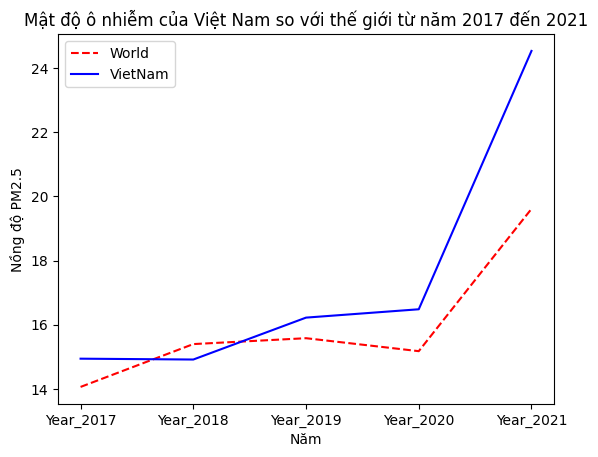

In [42]:
mean_Country = mean_Country_df.T.iloc[:, :5]
mean_VietNam = mean_VietNam_df.T.iloc[:, :5]
plt.plot(mean_Country, color = 'red', linestyle = '--')
plt.plot(mean_VietNam, color = 'blue', linestyle = '-')
plt.title('Mật độ ô nhiễm của Việt Nam so với thế giới từ năm 2017 đến 2021')
plt.xlabel('Năm')
plt.ylabel('Nồng độ PM2.5')
plt.legend(['World', 'VietNam'])

NHẬN XÉT:

_Có giai đoạn mật độ ô nhiễm ở Việt Nam đã giảm thấp hơn trung bình thế giới nhưng nhìn chung mức độ ô nhiễm ở Việt Nam vẫn khá cao so với thế giới:

    +Cái nhìn tích cực: Việt Nam ngày càng phát triển thì hoạt động sản xuất và sinh hoạt của người dân càng làm môi trường thêm xấu đi. Ở 1 khía cạnh nào đó thì Việt Nam cũng có giai đoạn thấp hơn trung bình thế giới.
    
    +Cái nhìn tiêu cực: Việc mật độ ô nhiễm ở Việt Nam vẫn luôn khá cao so với trung bình thế giới là tính hiệu đáng báo động cho chúng ta nhìn nhận lại ý thức người dân cũng như cần có chính sách khắc phục nhanh chóng để giải quyết vấn đề ô nhiễm (vấn đề cấp thiết của Việt Nam cũng như thế giới).